In [1]:
# %pip install polars
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib
# %pip install tqdm

In [35]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import IPython.display
from tqdm import tqdm

In [36]:
df = pl.read_csv("data.csv")
Y_col = "diagnosis"
df = (df
      .drop("id")
      .with_columns(
        pl.when(pl.col(Y_col) == "M").then(1).otherwise(0).alias(Y_col),
      )
    )

display(df.head())

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
1,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
1,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [37]:
X = df.drop(Y_col).to_numpy()
Y = df[Y_col].to_numpy()


Use the Scikit-learn implementation of SVM (the SVC() function) to predict if the tumor is malignant or not.  
Try different kernels.  


Try different:  
• kernels  
• regularization parameters  
• different σ values when using the RBF kernel (in Scikit-learn this is the γ parameter).  


Find the best values for the parameters and do a grid search. Tip: take a look at
the GridSearchCV() function.

In [38]:
from sklearn.svm import SVC

# Train an out of the box classifier to get a baseline of what can we expect

model = SVC()
model.fit(X,Y)
model.score(X,Y)

0.9226713532513181

In [39]:
def MSE(Y,Y_hat):
  return np.mean(np.square(Y-Y_hat))

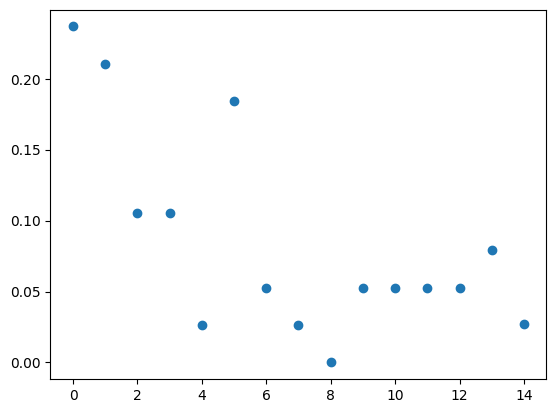

In [40]:
from sklearn.model_selection import KFold

train_scores = []

model = SVC()


N = 15
kf = KFold(n_splits=N)
for train, test in kf.split(np.arange(0, len(X))):
  x_train = X[train, :]
  y_train = Y[train]
  x_test = X[test, :]
  y_test = Y[test]


  model.fit(x_train, y_train)
  train_scores.append(MSE(y_test, model.predict(x_test)))

plt.scatter(np.arange(len(train_scores)), train_scores, label="Baseline scores")
plt.show()


In [ ]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'kernel': ['linear', 'poly'],  # Different kernels
    'C': [0.1, 1, 10],  # Regularization parameters
    'gamma': [0.1, 10, 100]  # Sigma values (only for RBF kernel)
}

# Create the SVM classifier
svm = SVC()

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', verbose=True)
grid_search.fit(x_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm.predict(x_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Store the results in a Polars DataFrame
results_df = pl.DataFrame(grid_search.cv_results_)



Running the above code takes alot of time!

- Linear kernel gives the best results

In [41]:
# Pretty print the results
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))
print("\nGrid Search Results:")
print(results_df[['params', 'mean_test_score', 'std_test_score']])

# Plot the results
# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 6))
# heatmap_data = results_df.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
# sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
# plt.title('Grid Search Results')
# plt.xlabel('Gamma')
# plt.ylabel('C')
# plt.show()

NameError: name 'grid_search' is not defined

# testing

due to performnce constraints, kernels aretested seperately

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

for i in range(1,10):
  linear_svm = SVC(kernel='linear', C=float(i))
  scores = cross_val_score(linear_svm, X, Y, cv=5)
  print( f"Score mean: {np.mean(scores)}, for C: {i}")

Score mean: 0.9455364073901569, for C: 1
Score mean: 0.952585002328831, for C: 2
Score mean: 0.9508306163639186, for C: 3
Score mean: 0.956078248719143, for C: 4
Score mean: 0.952585002328831, for C: 5
Score mean: 0.9543393882937432, for C: 6
Score mean: 0.952585002328831, for C: 7
Score mean: 0.9508306163639186, for C: 8
Score mean: 0.9508150908244062, for C: 9


In [43]:
linear_svm = SVC(kernel='linear', C=1)
scores = cross_val_score(linear_svm, X, Y, cv=5)
print( f"Score mean: {np.mean(scores)}")

Score mean: 0.956078248719143


# poly kernel

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

parameters = {'kernel':['poly'], 'C':np.linspace(1, 14, 7), 'degree': np.linspace(4, 12, 4).astype(np.int64), 'coef0': np.linspace(3, 8, 5)}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, Y)
print('Top ten results')
for index in np.argsort(clf.cv_results_['mean_test_score'])[::-1][:10]:
    print(clf.cv_results_['params'][index], clf.cv_results_['mean_test_score'][index])

KeyboardInterrupt: 

,x,y
i64,f64,f64
1,1.0,25.882522
2,1.25,21.573761
3,1.5,18.78032
4,1.75,17.12223
5,2.0,15.616773


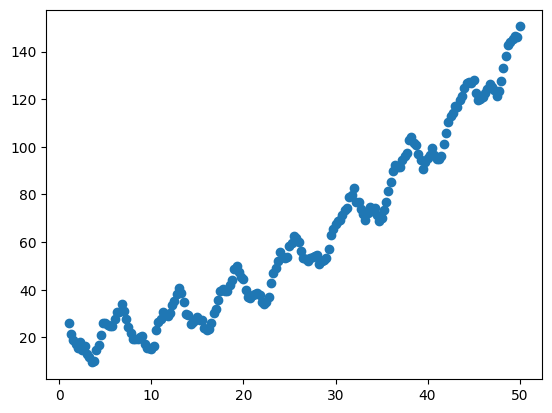

In [18]:
data = pl.read_csv('izi.csv')
display(data.head())
X = data['x']
y = data['y']
plt.scatter(data['x'], data['y'])
plt.show()

In [19]:
class KernelRegression:
    def __init__(self, kernel_func):
        self.ker = kernel_func

    def fit(self, X, y):
        self.X = X
        K = np.array([[self.ker(xi, xj) for xj in X] for xi in X])
        K += np.identity(K.shape[0]) * 1e-5
        self.alpha = np.linalg.solve(K, y)

    def predict(self, X):
        predictions = np.array([np.dot([self.ker(x, x_) for x_ in self.X], self.alpha) for x in X])
        return predictions

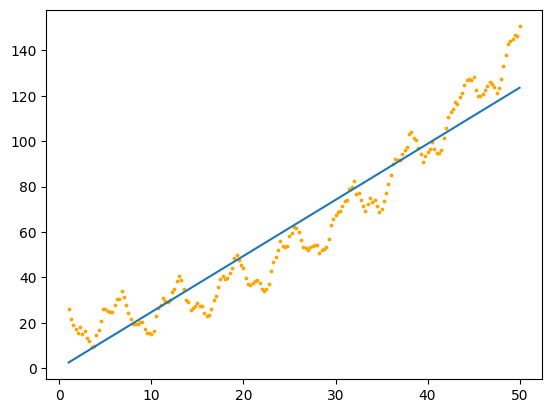

In [25]:
plt.scatter(X, y, s=3, color="orange")
def linear_kernel(x, x_, c=0):
    return x * x_ + c
model = KernelRegression(linear_kernel)
model.fit(X, y)
line = np.linspace(1, 50, 100)
plt.plot(line, model.predict(line))
plt.show()

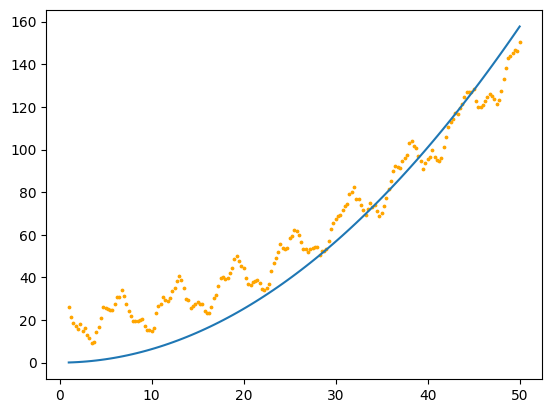

In [29]:
plt.scatter(X, y, s=3, color="orange")
def quadratic_kernel(x, x_, a=0.2):
    return (x*x_)**2*a
model = KernelRegression(quadratic_kernel)
model.fit(X, y)
line = np.linspace(1, 50, 100)
plt.plot(line, model.predict(line))
plt.show()

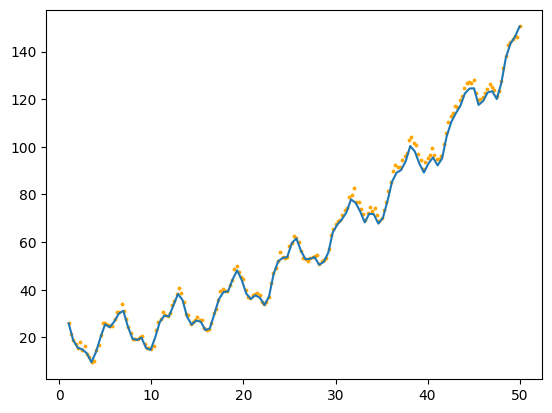

In [32]:
plt.scatter(X, y, s=3, color="orange")
def laplacian_kernel(x, x_prime, sigma=0.5):
    distance = np.linalg.norm(x - x_prime)
    return np.exp(-distance / sigma)

model = KernelRegression(laplacian_kernel)
model.fit(X, y)
line = np.linspace(1, 50, 100)
plt.plot(line, model.predict(line))
plt.show()